### Problem Statement

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

#### Analysing Basic Metrices

In [2]:
df=pd.read_csv('D:\SQL\Data Analytics\Walmart - Confidence Interval and CLT.csv')


In [3]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [5]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


##### Shape of Dataset

In [6]:
df.shape

(550068, 10)

1. Number of rows: 550068
2. Number of columns :10

In [7]:
print("Columns in Dataset:",df.columns)

Columns in Dataset: Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


###### Datatypes of Columns

In [9]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

The columns gender, age, city_category, stay_in_current_city_years and marital status can be converted into category datatype.

In [4]:
df["Gender"] = df["Gender"].astype('category')
df["Age"] = df["Age"].astype('category')
df["City_Category"] = df["City_Category"].astype('category')
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].astype('category')
df["Marital_Status"] = df["Marital_Status"].astype('category')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  int64   
 9   Purchase                    550068 non-null  int64   
dtypes: category(5), int64(4), object(1)
memory usage: 23.6+ MB


##### Statistical Summary

In [12]:
df.describe(include="all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.0,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,2.0,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,0.0,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,324731.0,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,NaN,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,NaN,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,8.000000,12054.000000


##### Checking Null Values

In [13]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [14]:
df.isna().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category              False
Purchase                      False
dtype: bool

##### Insights

1. There are 550068 rows and 10 columns
2. There are no null values in the dataset.
3. Columns User_ID,Occupation, Product_Category and Purchase are of integer datatype.
4. The columns gender, age, city_category, stay_in_current_city_years and marital status were converted into category datatype.
5. Range of Purchase Amount is from 12 Dollars to 23961 Dollars
6. Mean Purchase amount is 9263.968713 Dollars.
7. Median Purchase amount is 8047 Dollars.
8. There are 3631 unique Product_ID.
9. Age group which makes the most Purchases is 26-35  having 219587 Purchases.

### Non-Graphical Analysis: Value counts and unique attributes

In [15]:
df["Product_ID"].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

In [16]:
df["Gender"].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [73]:
df["Gender"].value_counts(normalize=True)

M    0.753105
F    0.246895
Name: Gender, dtype: float64

In [56]:
df["Age"].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [17]:
df["User_ID"].value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

In [18]:
df["City_Category"].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [19]:
df["Stay_In_Current_City_Years"].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [20]:
df["Marital_Status"].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [21]:
df["Occupation"].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [22]:
df["Product_Category"].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

#### Insights

1. P00265242 is the most selling product.
2. Males constitute 75% of the buyers.
3. Maximum number of Purchase are made by people of age group 26-35 having 219587 Purchases
4. User_ID 1001680 has made most number of Purchases.
5. People in City Category B have made most number of Purchases.
6. People Who have stayed in the City for 1 year have made more number of Purchses thenothers,
7. Unmarried People have made more Purchases.
8. Occupation Category Ranges from 0 to 20.
9. Maximum number of people belong to Occupation Category 4.
10. Maximum Sold Products belong to Product Category 5. 

### Visual Analysis - Univariate & Bivariate

##### Univariate (Numerical)

Occupation

<Axes: xlabel='Occupation', ylabel='Count'>

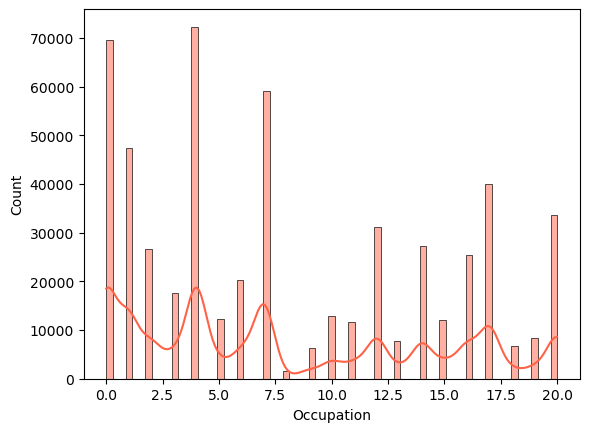

In [23]:
sns.histplot(data=df,x="Occupation",kde=True, color="tomato")

Product_Category

<Axes: xlabel='Product_Category', ylabel='Count'>

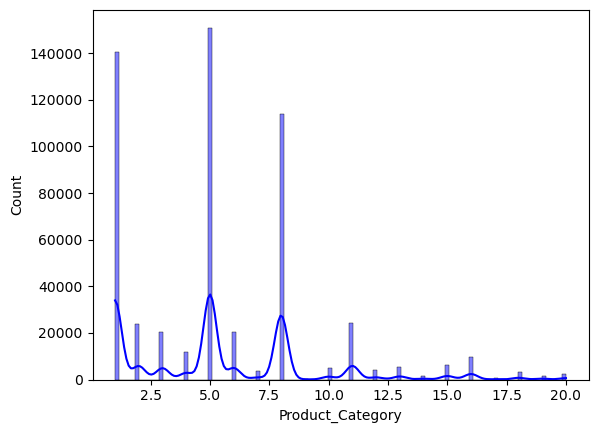

In [24]:
sns.histplot(data=df,x="Product_Category",kde=True, color="blue")

Purchase

<Axes: xlabel='Purchase', ylabel='Count'>

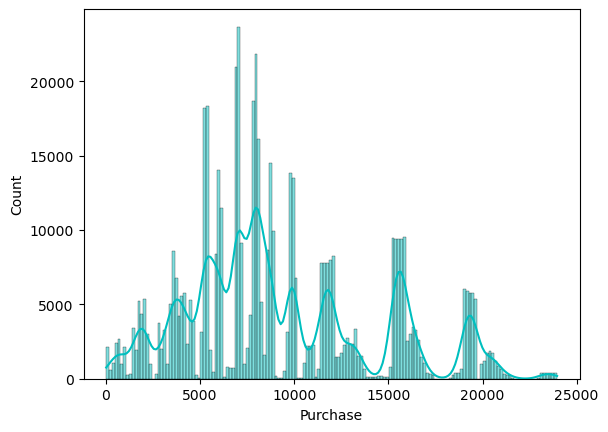

In [25]:
sns.histplot(data=df,x="Purchase",kde=True, color="c")

##### Univariate (Categorical)

Gender

<Axes: xlabel='Gender', ylabel='count'>

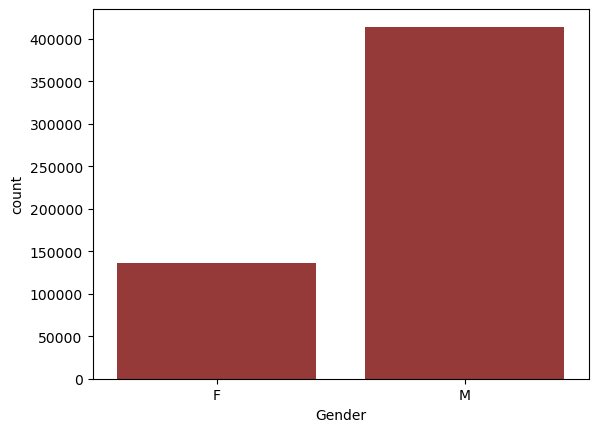

In [26]:
sns.countplot(data=df,x="Gender",color="brown")

Age

<Axes: xlabel='Age', ylabel='count'>

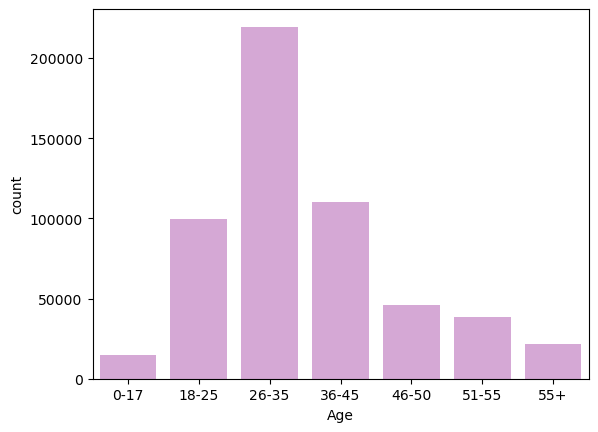

In [27]:
sns.countplot(data=df,x="Age",color="plum")

City_Category

<Axes: xlabel='City_Category', ylabel='count'>

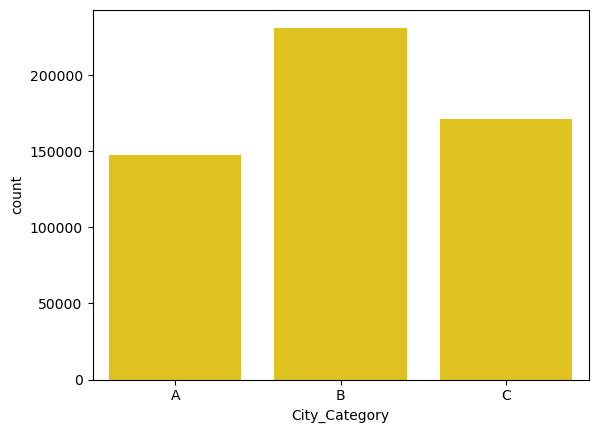

In [74]:
sns.countplot(data=df,x="City_Category",color="gold")

Stay_In_Current_City_Years

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

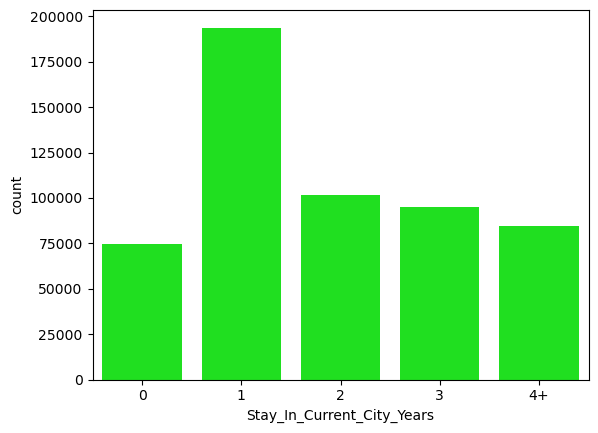

In [29]:
sns.countplot(data=df,x="Stay_In_Current_City_Years",color="lime")

Marital_Status

<Axes: xlabel='Marital_Status', ylabel='count'>

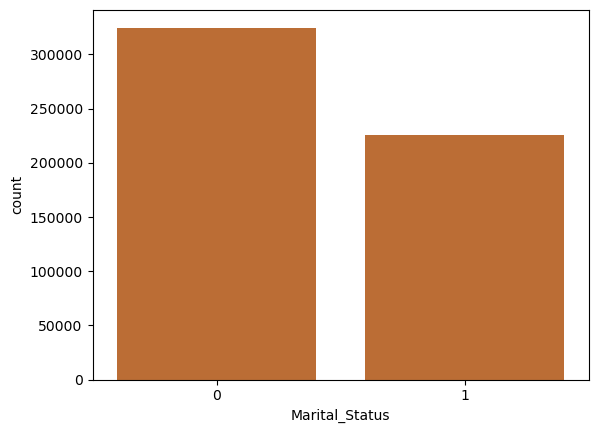

In [30]:
sns.countplot(data=df,x="Marital_Status",color="chocolate")

##### Insights

Occupation
1. Maximum number of buyers belong to Occupation category 4.
2. Least number of buyers belong to Occupation category 8

Product_Category
1. 1,5 and 8 are most selling Product_Category
2. 19 and 14 are least selling Product_Category

Purchase
1. Most number of Purchases are made between 5000 to 13000 Dollars
2. Less Purchases have been made between 20000 to 25000 Dollars

Gender
1. Maximum number of buyers are males

Age
1. Maximum number of buyers belong to age group 26-35.
2. Least number of buyers  belong to age group 0-17

City_Category
1. Maximum number of buyers belong to City Category B and least belong to City category A

Stay_In_Current_City_Years
1. Maximum number of buyers stay in current city for 1 year 

Marital_Status
1. There are more umarried buyers than married

#### Bivariate Analysis

How is purchase affected by gender?

<Axes: xlabel='Gender', ylabel='Purchase'>

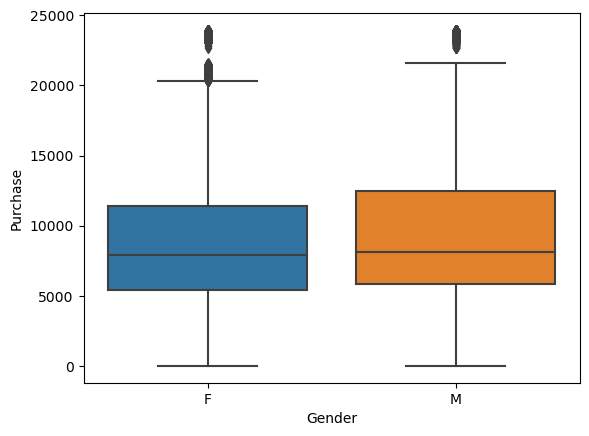

In [31]:
sns.boxplot(data=df,x="Gender",y="Purchase")

<Axes: xlabel='Purchase', ylabel='Density'>

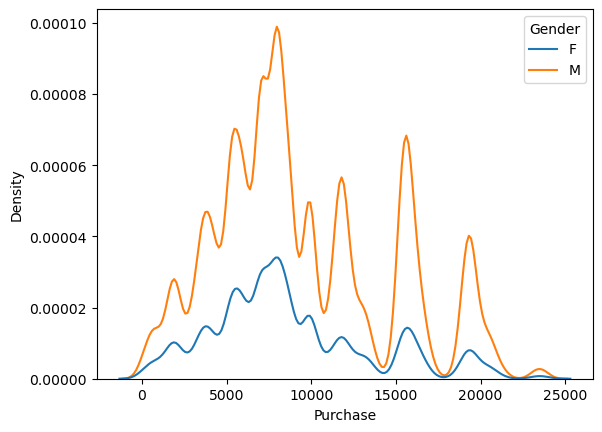

In [75]:
sns.kdeplot(data=df, x="Purchase", hue="Gender")

##### Insight

Median Purchase made by both Males and Females is around 8000 Dollars, Maximum number of Purchase are made by males.

Question: How is purchase affected by Age?

<Axes: xlabel='Age', ylabel='Purchase'>

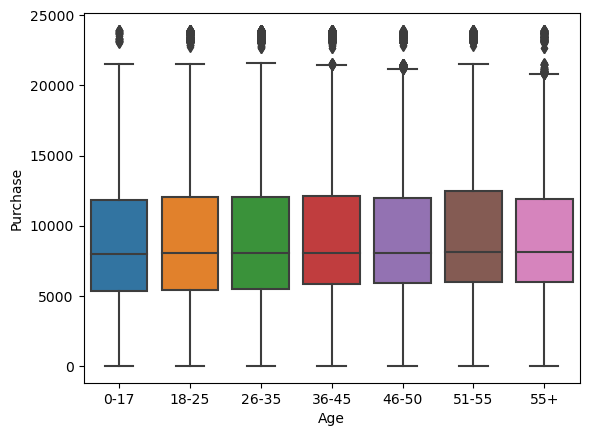

In [32]:
sns.boxplot(data=df,x="Age",y="Purchase")

##### Insight

Median Purchase Made by People of every age group is around 8000 Dollars.
People of every age group are equally likely to make most purchases between 5000 Dollars to around 12000 Dollars.

Question: How is purchase affected by Occupation?

<Axes: xlabel='Occupation', ylabel='Purchase'>

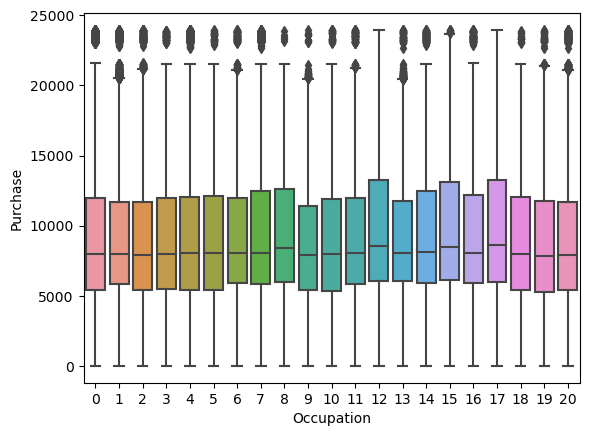

In [33]:
sns.boxplot(data=df,x="Occupation",y="Purchase")

##### Insights

Median Purchase Made by People of every Occupation is around 8000 Dollars. People of every Occupation are likely tomake most purchases between 5000 Dollars to around 13000 Dollars.

Question: How is purchase affected by City_Category?

<Axes: xlabel='City_Category', ylabel='Purchase'>

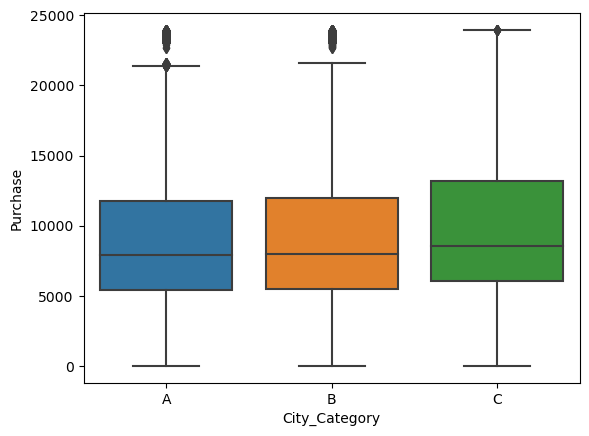

In [34]:
sns.boxplot(data=df,x="City_Category",y="Purchase")

##### Insights

Median Purchase Made by People of City Category C is around 9000 Dollars, and that of City_Category A and B have median purchase of around 8000 Dollars.
Most of the Purchases Made by people of City Category C range from around 6000 to 13000 Dollars whereas most of the Purchases made by People of City Category A and B range from around 5000 o 12000 Dollars.

Question: How is purchase affected by Stay_In_Current_City_Years?

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

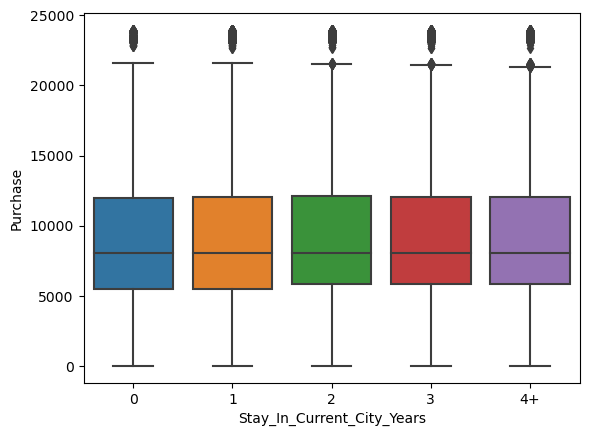

In [35]:
sns.boxplot(data=df,x="Stay_In_Current_City_Years",y="Purchase")

##### Insights

Median Purchase Made by People staying in City for every number of years is around 8000 Dollars.
People staying in City for every number of years make maximum purchases between 5000 Dollars to around 12000 Dollars.

Question: How is purchase affected by Marital_Status?

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

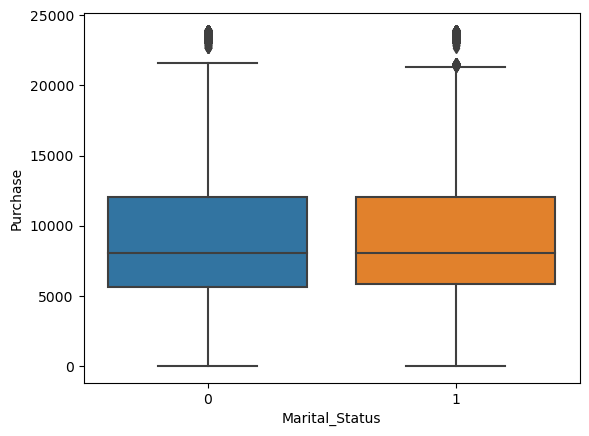

In [36]:
sns.boxplot(data=df,x="Marital_Status",y="Purchase")

##### Insights

Median Purchase made by both Married and Unmarried is around 8000 Dollars. Maximum number of Purchase are made between 5000 and 12000 Dollars.

Question How is purchase affected by Product_Category?

<Axes: xlabel='Product_Category', ylabel='Purchase'>

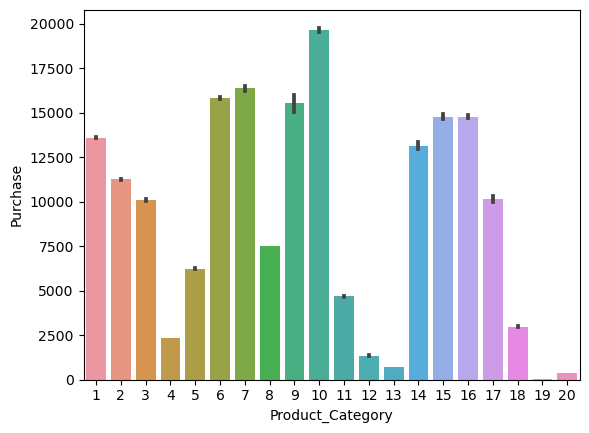

In [37]:
sns.barplot(data=df, x="Product_Category", y="Purchase")

#### Insight

Maximum revenue is generated by Product Category 10, and least revenue is generated by product category 19.

##### Corelation between Quantities

In [15]:
df1=df.drop(['Product_ID', 'Gender', 'Age','City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status'], axis=1)

In [16]:
df1.corr()

,User_ID,Occupation,Product_Category,Purchase
User_ID,1.000000,-0.023971,0.003825,0.004716
Occupation,-0.023971,1.000000,-0.007618,0.020833
Product_Category,0.003825,-0.007618,1.000000,-0.343703
Purchase,0.004716,0.020833,-0.343703,1.000000


<Axes: >

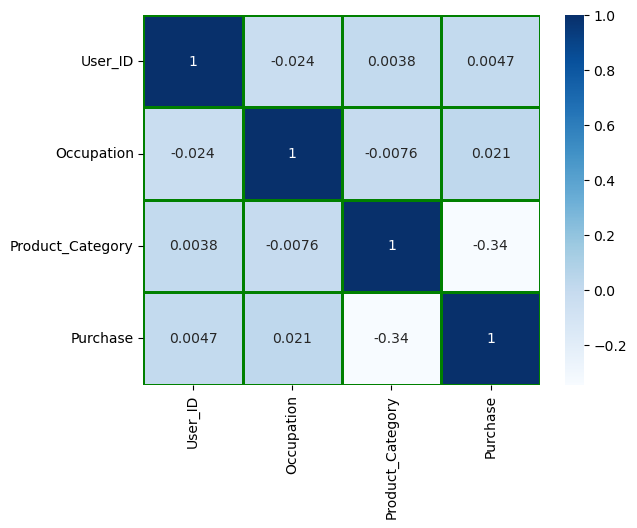

In [17]:
sns.heatmap(df1.corr(),annot=True,cmap="Blues",linewidths=1.0,linecolor="green")

##### Insight

1. We don’t see a strong correlation of purchase with any feature.
2. There’s a weak negative correlation between product category and purchase amount.


#### Outlier Detection

Occcupation

<Axes: >

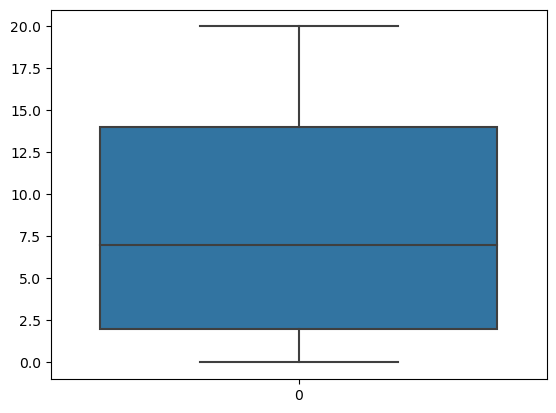

In [87]:
sns.boxplot(df["Occupation"])

Product_Category

<Axes: >

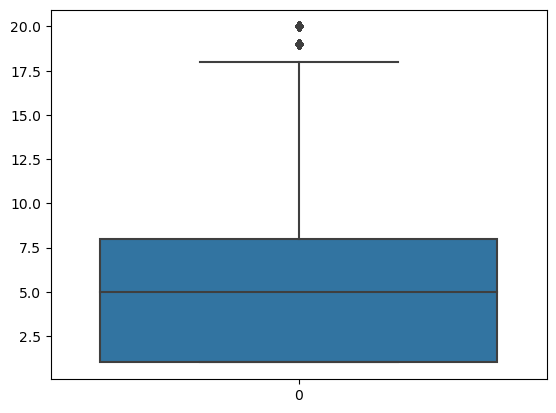

In [8]:
sns.boxplot(df["Product_Category"])


Purchase

<Axes: >

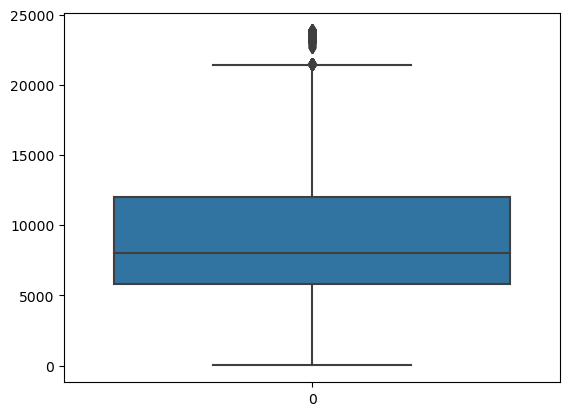

In [9]:
sns.boxplot(df["Purchase"])

##### Insight

Purchase and Product_category has outliers and Occuoation doesnot have outliers.

#### Are women spending more money per transaction than men? Why or Why not?

In [96]:
df_m=df.loc[df["Gender"]=="M",'Purchase']
df_f=df.loc[df["Gender"]=="F",'Purchase']

In [90]:
df_m.mean()

9437.526040472265

In [91]:
df_f.mean()

8734.565765155476

<Axes: xlabel='Purchase', ylabel='Count'>

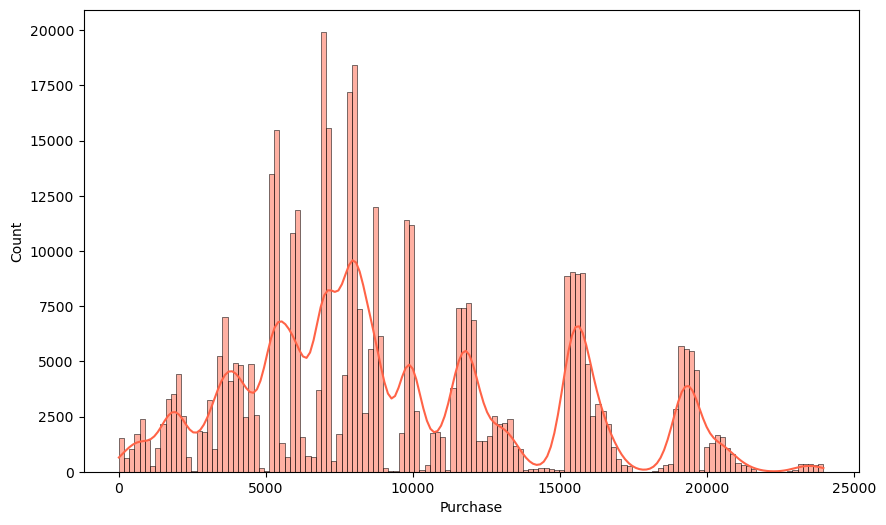

In [93]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_m,kde=True, color="tomato")

<Axes: xlabel='Purchase', ylabel='Count'>

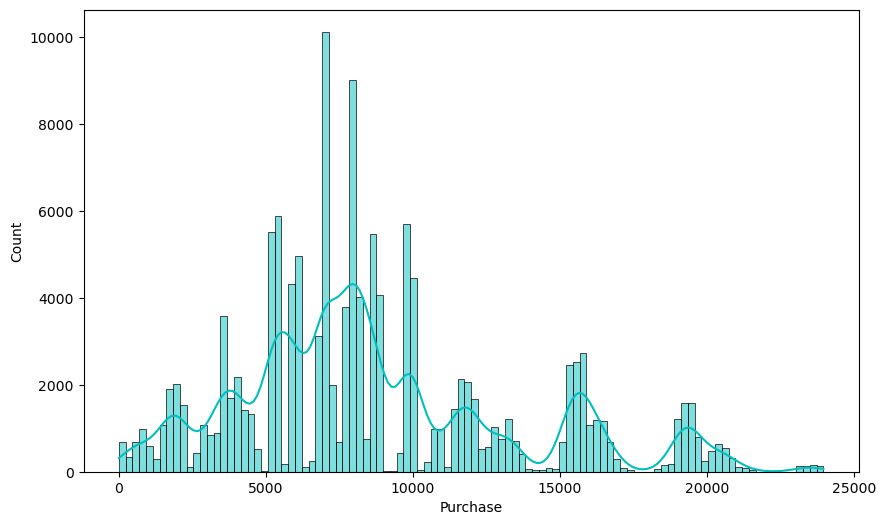

In [94]:
plt.figure(figsize=(10,6))
sns.histplot(data=df_f,kde=True, color="c")

In [100]:
df.loc[df["Gender"]=="M",'Marital_Status'].value_counts(normalize=True)

0    0.593614
1    0.406386
Name: Marital_Status, dtype: float64

In [101]:
df.loc[df["Gender"]=="F",'Marital_Status'].value_counts(normalize=True)

0    0.580381
1    0.419619
Name: Marital_Status, dtype: float64

In [112]:
df.loc[df["Gender"]=="M",'Product_ID'].value_counts()

P00265242    1372
P00025442    1267
P00110742    1247
P00112142    1223
P00057642    1212
             ... 
P00340742       1
P00306942       1
P00144142       1
P00065542       1
P00203742       1
Name: Product_ID, Length: 3588, dtype: int64

In [113]:
df.loc[df["Gender"]=="F",'Product_ID'].value_counts()

P00265242    508
P00220442    440
P00058042    387
P00255842    375
P00110742    365
            ... 
P00245742      1
P00229142      1
P00310942      1
P00225242      1
P00271642      1
Name: Product_ID, Length: 3367, dtype: int64

In [121]:
df.loc[df["Gender"]=="M",'Product_Category'].value_counts(normalize=True)*100

1     27.892454
5     26.305282
8     19.400182
11     4.718787
2      4.394835
6      3.839868
3      3.429497
4      1.958678
16     1.792598
15     1.265875
13     0.986581
10     0.956648
7      0.670595
18     0.662146
12     0.582969
20     0.441028
19     0.278087
14     0.217255
17     0.124560
9      0.082074
Name: Product_Category, dtype: float64

In [122]:
df.loc[df["Gender"]=="F",'Product_Category'].value_counts(normalize=True)*100

5     30.897069
8     24.709703
1     18.283766
3      4.422387
2      4.166145
11     3.489459
6      3.356920
4      2.679498
16     1.768660
12     1.128055
13     1.076512
10     0.855613
15     0.770199
7      0.694358
20     0.532365
14     0.458732
19     0.332084
18     0.281277
9      0.051543
17     0.045652
Name: Product_Category, dtype: float64

### Insights

 Average amount spent by males is 9437.526040472265 and Average amount spent by females is 8734.565765155476
 
 
 Most Revenue generating Product_Categories are 10,7,6,9,15,16,1,2,3 and 17
 1. From category 10, 0.95% males purchased and 0.85% females purchased.
 2. From category 6,  3.83% males Purchased and 3.35% females purchased.
 3. From category 9,  0.08% males Purchased and 0.04% females purchased.
 4. From category 15, 1.26% males Purchased and 0.77% females purchased.
 5. From category 16, 1.79% males Purchased and 1.76% females purchased.
 6. From category 1, 27.89% males Purchased and 18.28% females purchased.
 7. From category 2,  4.39% males Purchased and 4.16% females purchased.
 8. From category 3,  3.42% males Purchased and 4.42% females purchased.
 9. From category 7,  0.67% males Purchased and 0.69% females purchased.
 10. From category 17,  0.124% males Purchased and 0.045% females purchased.
 
 So, we can say that women are not spending more money per transaction than men because the most revenue generating Product_Categories are more Popular with men.

##### Central limit Theorem

#### Confidance Intervals For Males and Females

In [31]:
df_m=df.loc[df["Gender"]=="M",'Purchase']

In [32]:
df_m

4          7969
5         15227
6         19215
7         15854
8         15686
          ...  
550057       61
550058      121
550060      494
550062      473
550063      368
Name: Purchase, Length: 414259, dtype: int64

In [33]:
df_f=df.loc[df["Gender"]=="F",'Purchase']

In [34]:
df_f

0          8370
1         15200
2          1422
3          1057
14         5378
          ...  
550061      599
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 135809, dtype: int64

In [40]:
# 99% CI for different Sample Sizes
for n in [4,40,400,4000,40000,100000]:
    print("for size", n)
    samp1 = df_m.sample(n)
    m=samp1.mean()
    s = samp1.std()
    se = s / np.sqrt(n)
    z_left = norm.ppf(0.005)
    z_right = norm.ppf(0.995)
    x1 = m + (z_left*se)
    x2 = m + (z_right*se)
    print("99% CI  for males is [", x1,",",x2,"]")
    
    samp2 = df_f.sample(n)
    m=samp2.mean()
    s = samp2.std()
    se = s / np.sqrt(n)
    z_left = norm.ppf(0.005)
    z_right = norm.ppf(0.995)
    x1 = m + (z_left*se)
    x2 = m + (z_right*se)
    print("99% CI for females is [", x1,",",x2,"]")



for size 4
99% CI  for males is [ 7337.992135156855 , 16528.507864843144 ]
99% CI for females is [ 3902.8605272812783 , 22721.63947271872 ]
for size 40
99% CI  for males is [ 8541.357774291193 , 11707.942225708806 ]
99% CI for females is [ 7126.644871888975 , 11098.155128111024 ]
for size 400
99% CI  for males is [ 8869.42019979316 , 10153.854800206842 ]
99% CI for females is [ 7940.941006241492 , 9164.213993758507 ]
for size 4000
99% CI  for males is [ 9186.037615066614 , 9594.741884933386 ]
99% CI for females is [ 8633.661029689933 , 9028.004970310069 ]
for size 40000
99% CI  for males is [ 9392.542603943082 , 9523.617996056917 ]
99% CI for females is [ 8665.75621105304 , 8788.32288894696 ]
for size 100000
99% CI  for males is [ 9415.27066380498 , 9498.24167619502 ]
99% CI for females is [ 8694.03636301907 , 8771.757516980932 ]


In [41]:
# 95% CI for different Sample Sizes
for n in [4,40,400,4000,40000,100000]:
    print("for size", n)
    samp1 = df_m.sample(n)
    m=samp1.mean()
    s = samp1.std()
    se = s / np.sqrt(n)
    z_left = norm.ppf(0.025)
    z_right = norm.ppf(0.975)
    x1 = m + (z_left*se)
    x2 = m + (z_right*se)
    print("95% CI  for males is [", x1,",",x2,"]")
    
    samp2 = df_f.sample(n)
    m=samp2.mean()
    s = samp2.std()
    se = s / np.sqrt(n)
    z_left = norm.ppf(0.025)
    z_right = norm.ppf(0.975)
    x1 = m + (z_left*se)
    x2 = m + (z_right*se)
    print("95% CI for females is [", x1,",",x2,"]")

for size 4
95% CI  for males is [ 4457.169781375145 , 11504.330218624855 ]
95% CI for females is [ 3882.6663716068424 , 13692.333628393157 ]
for size 40
95% CI  for males is [ 8604.124287063734 , 11338.225712936264 ]
95% CI for females is [ 7485.558872484365 , 10971.441127515634 ]
for size 400
95% CI  for males is [ 9296.646147528618 , 10254.758852471381 ]
95% CI for females is [ 8629.60760063329 , 9607.167399366712 ]
for size 4000
95% CI  for males is [ 9301.24631452262 , 9615.614685477381 ]
95% CI for females is [ 8631.238304174349 , 8929.65069582565 ]
for size 40000
95% CI  for males is [ 9370.680312679737 , 9470.129437320264 ]
95% CI for females is [ 8686.332653978017 , 8780.279496021984 ]
for size 100000
95% CI  for males is [ 9394.336485850637 , 9457.411014149364 ]
95% CI for females is [ 8722.22202311973 , 8781.39519688027 ]


In [42]:
# 90% CI for different Sample Sizes
for n in [4,40,400,4000,40000,100000]:
    print("for size", n)
    samp1 = df_m.sample(n)
    m=samp1.mean()
    s = samp1.std()
    se = s / np.sqrt(n)
    z_left = norm.ppf(0.05)
    z_right = norm.ppf(0.95)
    x1 = m + (z_left*se)
    x2 = m + (z_right*se)
    print("90% CI  for males is [", x1,",",x2,"]")
    
    samp2 = df_f.sample(n)
    m=samp2.mean()
    s = samp2.std()
    se = s / np.sqrt(n)
    z_left = norm.ppf(0.05)
    z_right = norm.ppf(0.95)
    x1 = m + (z_left*se)
    x2 = m + (z_right*se)
    print("90% CI for females is [", x1,",",x2,"]")

for size 4
90% CI  for males is [ 7997.661792617616 , 17122.33820738238 ]
90% CI for females is [ 3588.836453242746 , 6587.163546757253 ]
for size 40
90% CI  for males is [ 8185.909996267755 , 11309.240003732246 ]
90% CI for females is [ 8001.278382122067 , 10742.371617877934 ]
for size 400
90% CI  for males is [ 9040.176302017662 , 9893.963697982337 ]
90% CI for females is [ 8519.097221235672 , 9292.282778764327 ]
for size 4000
90% CI  for males is [ 9187.82606671888 , 9451.95443328112 ]
90% CI for females is [ 8620.828852494426 , 8867.746647505573 ]
for size 40000
90% CI  for males is [ 9395.802847279463 , 9479.354052720539 ]
90% CI for females is [ 8680.265786212063 , 8758.744913787936 ]
for size 100000
90% CI  for males is [ 9409.591014254602 , 9462.5597257454 ]
90% CI for females is [ 8706.807360806819 , 8756.503519193182 ]


##### Insights

For 99% Confidence Interval
As the sample size increases, the two groups start to become distinct

For Female (sample size 100000) range for mean purchase with confidence interval 99% is [[8694.03636301907 , 8771.757516980932]

For Male range for mean purchase with confidence interval 99% is [9415.27066380498 , 9498.24167619502 ] ]


For 95% Confidence Interval
As the sample size increases, the two groups start to become distinct

For Female (sample size 100000) range for mean purchase with confidence interval 95% [ 8722.22202311973 , 8781.39519688027 ]

For Male range for mean purchase with confidence interval 95% is [9394.336485850637 , 9457.411014149364]

For 90% Confidence Interval As the sample size increases, the two groups start to become distinct

For Female (sample size 100000) range for mean purchase with confidence interval 90% [  8706.807360806819 , 8756.503519193182]

For Male range for mean purchase with confidence interval 95% is [9409.591014254602 , 9462.5597257454]

#### Confidance Intervals for Married vs Non Married

In [46]:
df_married=df.loc[df["Marital_Status"]==1,'Purchase']

In [49]:
df_unmarried=df.loc[df["Marital_Status"]==0,'Purchase']

In [47]:
df_married

6         19215
7         15854
8         15686
9          7871
10         5254
          ...  
550060      494
550061      599
550063      368
550065      137
550067      490
Name: Purchase, Length: 225337, dtype: int64

In [50]:
df_unmarried

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550056      254
550059       48
550062      473
550064      371
550066      365
Name: Purchase, Length: 324731, dtype: int64

In [51]:
# 99% CI for different Sample Sizes
for n in [4,40,400,4000,40000,100000]:
    print("for size", n)
    samp1 = df_married.sample(n)
    m=samp1.mean()
    s = samp1.std()
    se = s / np.sqrt(n)
    z_left = norm.ppf(0.005)
    z_right = norm.ppf(0.995)
    x1 = m + (z_left*se)
    x2 = m + (z_right*se)
    print("99% CI  for married people is [", x1,",",x2,"]")
    
    samp2 = df_unmarried.sample(n)
    m=samp2.mean()
    s = samp2.std()
    se = s / np.sqrt(n)
    z_left = norm.ppf(0.005)
    z_right = norm.ppf(0.995)
    x1 = m + (z_left*se)
    x2 = m + (z_right*se)
    print("99% CI for unmarried people is [", x1,",",x2,"]")



for size 4
99% CI  for married people is [ 79.09438786639475 , 18386.905612133603 ]
99% CI for unmarried people is [ 2650.579771648195 , 8185.920228351804 ]
for size 40
99% CI  for married people is [ 6593.003378602711 , 10460.24662139729 ]
99% CI for unmarried people is [ 6128.253473086118 , 9871.596526913881 ]
for size 400
99% CI  for married people is [ 8588.138544760663 , 9914.471455239338 ]
99% CI for unmarried people is [ 8389.361851673211 , 9631.348148326788 ]
for size 4000
99% CI  for married people is [ 9095.844962768084 , 9508.352537231915 ]
99% CI for unmarried people is [ 9003.945025642051 , 9416.82897435795 ]
for size 40000
99% CI  for married people is [ 9204.464138989199 , 9333.5797110108 ]
99% CI for unmarried people is [ 9177.559291456862 , 9306.99565854314 ]
for size 100000
99% CI  for married people is [ 9212.681948578966 , 9294.357831421034 ]
99% CI for unmarried people is [ 9218.26964923683 , 9300.144430763168 ]


In [52]:
# 95% CI for different Sample Sizes
for n in [4,40,400,4000,40000,100000]:
    print("for size", n)
    samp1 = df_married.sample(n)
    m=samp1.mean()
    s = samp1.std()
    se = s / np.sqrt(n)
    z_left = norm.ppf(0.025)
    z_right = norm.ppf(0.975)
    x1 = m + (z_left*se)
    x2 = m + (z_right*se)
    print("95% CI  for married people is [", x1,",",x2,"]")
    
    samp2 = df_unmarried.sample(n)
    m=samp2.mean()
    s = samp2.std()
    se = s / np.sqrt(n)
    z_left = norm.ppf(0.025)
    z_right = norm.ppf(0.975)
    x1 = m + (z_left*se)
    x2 = m + (z_right*se)
    print("95% CI for unmarried people is [", x1,",",x2,"]")


for size 4
95% CI  for married people is [ 3449.589926391164 , 13864.410073608835 ]
95% CI for unmarried people is [ 6847.541665359452 , 12240.958334640547 ]
for size 40
95% CI  for married people is [ 8761.594626031072 , 11631.755373968927 ]
95% CI for unmarried people is [ 7923.539749393296 , 11020.510250606701 ]
for size 400
95% CI  for married people is [ 8661.096869378625 , 9636.843130621373 ]
95% CI for unmarried people is [ 8791.377093439383 , 9802.322906560617 ]
for size 4000
95% CI  for married people is [ 9188.216906088726 , 9495.711093911274 ]
95% CI for unmarried people is [ 9016.031183383104 , 9325.359816616896 ]
for size 40000
95% CI  for married people is [ 9216.574348779983 , 9314.832701220019 ]
95% CI for unmarried people is [ 9183.649283404415 , 9281.844416595584 ]
for size 100000
95% CI  for married people is [ 9230.278132427455 , 9292.558247572546 ]
95% CI for unmarried people is [ 9252.627271299076 , 9315.058568700922 ]


In [53]:
# 90% CI for different Sample Sizes
for n in [4,40,400,4000,40000,100000]:
    print("for size", n)
    samp1 = df_married.sample(n)
    m=samp1.mean()
    s = samp1.std()
    se = s / np.sqrt(n)
    z_left = norm.ppf(0.05)
    z_right = norm.ppf(0.95)
    x1 = m + (z_left*se)
    x2 = m + (z_right*se)
    print("90% CI  for married people is [", x1,",",x2,"]")
    
    samp2 = df_unmarried.sample(n)
    m=samp2.mean()
    s = samp2.std()
    se = s / np.sqrt(n)
    z_left = norm.ppf(0.05)
    z_right = norm.ppf(0.95)
    x1 = m + (z_left*se)
    x2 = m + (z_right*se)
    print("90% CI for unmarried people is [", x1,",",x2,"]")

for size 4
90% CI  for married people is [ 2683.560338589073 , 8204.939661410925 ]
90% CI for unmarried people is [ 3088.35676797233 , 14870.143232027667 ]
for size 40
90% CI  for married people is [ 10212.220775522204 , 12593.229224477796 ]
90% CI for unmarried people is [ 6566.7311386818255 , 8873.068861318174 ]
for size 400
90% CI  for married people is [ 9048.33359900659 , 9878.21640099341 ]
90% CI for unmarried people is [ 8404.86145593835 , 9188.378544061652 ]
for size 4000
90% CI  for married people is [ 9128.504731230183 , 9389.249768769816 ]
90% CI for unmarried people is [ 9206.782659500175 , 9469.894840499826 ]
for size 40000
90% CI  for married people is [ 9248.63951911415 , 9331.646880885852 ]
90% CI for unmarried people is [ 9235.156944698445 , 9317.737105301554 ]
for size 100000
90% CI  for married people is [ 9246.626434028321 , 9298.985345971678 ]
90% CI for unmarried people is [ 9254.299983143881 , 9306.56909685612 ]


##### Insights

Overlapping is evident for married vs single customer spend even when more samples are analyzed, which indicates that customers spend the same regardless of whether they are single or married.

For Unmarried customer (sample size 100000) range for mean purchase with confidence interval 99% is [9218.26964923683 , 9300.144430763168 ],
with confidence interval 95% is [9252.627271299076 , 9315.058568700922],
with confidence interval 90% is [9254.299983143881 , 9306.56909685612].


For married customer range for mean purchase with confidence interval 99% is [9212.681948578966 , 9294.357831421034],
with confidence interval 95% is [9230.278132427455 , 9292.558247572546],
with confidence interval 90% is [9246.626434028321 , 9298.985345971678].

#### Confidance Intervals for Different Ages

In [54]:
df_age0_17=df.loc[df["Age"]=="0-17",'Purchase']

In [55]:
df_age0_17

0          8370
1         15200
2          1422
3          1057
85         7746
          ...  
549904      256
550012       26
550024       12
550035       61
550046      236
Name: Purchase, Length: 15102, dtype: int64

In [57]:
df_age18_25=df.loc[df["Age"]=="18-25",'Purchase']

In [58]:
df_age18_25

70         1780
71        10754
72         2802
73        19473
74        19672
          ...  
550000       14
550015      477
550017      363
550020       36
550032      491
Name: Purchase, Length: 99660, dtype: int64

In [59]:
df_age26_35=df.loc[df["Age"]=="26-35",'Purchase']

In [60]:
df_age26_35

5         15227
9          7871
10         5254
11         3957
12         6073
          ...  
550058      121
550059       48
550061      599
550064      371
550065      137
Name: Purchase, Length: 219587, dtype: int64

In [61]:
df_age36_45=df.loc[df["Age"]=="36-45",'Purchase']

In [62]:
df_age36_45

18        11788
29        16352
30         8886
31         5875
32         8854
          ...  
550049      473
550050      368
550053      371
550054       60
550060      494
Name: Purchase, Length: 110013, dtype: int64

In [63]:
df_age46_50=df.loc[df["Age"]=="46-50",'Purchase']

In [64]:
df_age46_50

6         19215
7         15854
8         15686
52         5839
53        15912
          ...  
550041      488
550043       48
550052      239
550062      473
550067      490
Name: Purchase, Length: 45701, dtype: int64

In [65]:
df_age51_55=df.loc[df["Age"]=="51-55",'Purchase']

In [66]:
df_age51_55

14         5378
15         2079
16        13055
17         8851
67        15872
          ...  
549985       24
550004       12
550037       62
550042      243
550063      368
Name: Purchase, Length: 38501, dtype: int64

In [67]:
df_age55=df.loc[df["Age"]=="55+",'Purchase']

In [68]:
df_age55

4          7969
159        8596
160        5248
161       10592
162        3482
          ...  
549925      121
549989       12
550008       50
550030      376
550066      365
Name: Purchase, Length: 21504, dtype: int64

In [69]:
# 99% CI for different Sample Sizes
for n in [4,40,400,4000,10000]:
    print("for size", n)
    samp1 = df_age0_17.sample(n)
    m=samp1.mean()
    s = samp1.std()
    se = s / np.sqrt(n)
    z_left = norm.ppf(0.005)
    z_right = norm.ppf(0.995)
    x1 = m + (z_left*se)
    x2 = m + (z_right*se)
    print("99% CI  for teenage people is [", x1,",",x2,"]")
    
    samp2 = df_age18_25.sample(n)
    m=samp2.mean()
    s = samp2.std()
    se = s / np.sqrt(n)
    z_left = norm.ppf(0.005)
    z_right = norm.ppf(0.995)
    x1 = m + (z_left*se)
    x2 = m + (z_right*se)
    print("99% CI for people of age between 18 and 25 is [", x1,",",x2,"]")
    
    samp3 = df_age26_35.sample(n)
    m=samp3.mean()
    s = samp3.std()
    se = s / np.sqrt(n)
    z_left = norm.ppf(0.005)
    z_right = norm.ppf(0.995)
    x1 = m + (z_left*se)
    x2 = m + (z_right*se)
    print("99% CI for people of age between 26 and 35 is [", x1,",",x2,"]")

    
    samp4 = df_age36_45.sample(n)
    m=samp4.mean()
    s = samp4.std()
    se = s / np.sqrt(n)
    z_left = norm.ppf(0.005)
    z_right = norm.ppf(0.995)
    x1 = m + (z_left*se)
    x2 = m + (z_right*se)
    print("99% CI for people of age between 36 and 45 is [", x1,",",x2,"]")
    
    samp5 = df_age46_50.sample(n)
    m=samp5.mean()
    s = samp5.std()
    se = s / np.sqrt(n)
    z_left = norm.ppf(0.005)
    z_right = norm.ppf(0.995)
    x1 = m + (z_left*se)
    x2 = m + (z_right*se)
    print("99% CI for people of age between 46 and 50 is [", x1,",",x2,"]")

    samp6 = df_age51_55.sample(n)
    m=samp6.mean()
    s = samp6.std()
    se = s / np.sqrt(n)
    z_left = norm.ppf(0.005)
    z_right = norm.ppf(0.995)
    x1 = m + (z_left*se)
    x2 = m + (z_right*se)
    print("99% CI for people of age between 51and 55 is [", x1,",",x2,"]")

    samp7 = df_age55.sample(n)
    m=samp7.mean()
    s = samp7.std()
    se = s / np.sqrt(n)
    z_left = norm.ppf(0.005)
    z_right = norm.ppf(0.995)
    x1 = m + (z_left*se)
    x2 = m + (z_right*se)
    print("99% CI for people of age 55 and more is [", x1,",",x2,"]")




for size 4
99% CI  for teenage people is [ 2739.064931408764 , 15356.435068591236 ]
99% CI for people of age between 18 and 25 is [ 970.2063917398282 , 11005.79360826017 ]
99% CI for people of age between 26 and 35 is [ 4331.118088857507 , 11046.881911142493 ]
99% CI for people of age between 36 and 45 is [ 4418.395124150418 , 11122.604875849582 ]
99% CI for people of age between 46 and 50 is [ 1534.3350606351505 , 18099.664939364848 ]
99% CI for people of age between 51and 55 is [ 4810.555285644304 , 8079.444714355695 ]
99% CI for people of age 55 and more is [ 1780.959568754717 , 10382.540431245281 ]
for size 40
99% CI  for teenage people is [ 7509.899260366725 , 12102.800739633276 ]
99% CI for people of age between 18 and 25 is [ 6842.5010927579815 , 10946.548907242017 ]
99% CI for people of age between 26 and 35 is [ 7855.657774923342 , 11867.99222507666 ]
99% CI for people of age between 36 and 45 is [ 6608.396324010098 , 10679.553675989902 ]
99% CI for people of age between 46 an

In [70]:
# 95% CI for different Sample Sizes
for n in [4,40,400,4000,10000]:
    print("for size", n)
    samp1 = df_age0_17.sample(n)
    m=samp1.mean()
    s = samp1.std()
    se = s / np.sqrt(n)
    z_left = norm.ppf(0.025)
    z_right = norm.ppf(0.975)
    x1 = m + (z_left*se)
    x2 = m + (z_right*se)
    print("95% CI  for teenage people is [", x1,",",x2,"]")
    
    samp2 = df_age18_25.sample(n)
    m=samp2.mean()
    s = samp2.std()
    se = s / np.sqrt(n)
    z_left = norm.ppf(0.025)
    z_right = norm.ppf(0.975)
    x1 = m + (z_left*se)
    x2 = m + (z_right*se)
    print("95% CI for people of age between 18 and 25 is [", x1,",",x2,"]")
    
    samp3 = df_age26_35.sample(n)
    m=samp3.mean()
    s = samp3.std()
    se = s / np.sqrt(n)
    z_left = norm.ppf(0.025)
    z_right = norm.ppf(0.975)
    x1 = m + (z_left*se)
    x2 = m + (z_right*se)
    print("95% CI for people of age between 26 and 35 is [", x1,",",x2,"]")

    
    samp4 = df_age36_45.sample(n)
    m=samp4.mean()
    s = samp4.std()
    se = s / np.sqrt(n)
    z_left = norm.ppf(0.025)
    z_right = norm.ppf(0.975)
    x1 = m + (z_left*se)
    x2 = m + (z_right*se)
    print("95% CI for people of age between 36 and 45 is [", x1,",",x2,"]")
    
    samp5 = df_age46_50.sample(n)
    m=samp5.mean()
    s = samp5.std()
    se = s / np.sqrt(n)
    z_left = norm.ppf(0.025)
    z_right = norm.ppf(0.975)
    x1 = m + (z_left*se)
    x2 = m + (z_right*se)
    print("95% CI for people of age between 46 and 50 is [", x1,",",x2,"]")

    samp6 = df_age51_55.sample(n)
    m=samp6.mean()
    s = samp6.std()
    se = s / np.sqrt(n)
    z_left = norm.ppf(0.025)
    z_right = norm.ppf(0.975)
    x1 = m + (z_left*se)
    x2 = m + (z_right*se)
    print("95% CI for people of age between 51and 55 is [", x1,",",x2,"]")

    samp7 = df_age55.sample(n)
    m=samp7.mean()
    s = samp7.std()
    se = s / np.sqrt(n)
    z_left = norm.ppf(0.025)
    z_right = norm.ppf(0.975)
    x1 = m + (z_left*se)
    x2 = m + (z_right*se)
    print("95% CI for people of age 55 and more is [", x1,",",x2,"]")


for size 4
95% CI  for teenage people is [ 4142.680535972044 , 15154.319464027954 ]
95% CI for people of age between 18 and 25 is [ 2487.1600549386076 , 20664.839945061387 ]
95% CI for people of age between 26 and 35 is [ 2213.403495204895 , 18070.096504795103 ]
95% CI for people of age between 36 and 45 is [ 8910.95293766517 , 19981.54706233483 ]
95% CI for people of age between 46 and 50 is [ 3080.236034646684 , 15998.763965353315 ]
95% CI for people of age between 51and 55 is [ 8358.633361678161 , 12449.866638321837 ]
95% CI for people of age 55 and more is [ 71.96572044711684 , 16745.03427955288 ]
for size 40
95% CI  for teenage people is [ 7848.4443156175785 , 10700.555684382422 ]
95% CI for people of age between 18 and 25 is [ 7655.843697282631 , 10613.656302717369 ]
95% CI for people of age between 26 and 35 is [ 8041.924709059176 , 11251.125290940823 ]
95% CI for people of age between 36 and 45 is [ 8871.914632004013 , 11415.935367995986 ]
95% CI for people of age between 46 an

In [71]:
# 90% CI for different Sample Sizes
for n in [4,40,400,4000,10000]:
    print("for size", n)
    samp1 = df_age0_17.sample(n)
    m=samp1.mean()
    s = samp1.std()
    se = s / np.sqrt(n)
    z_left = norm.ppf(0.05)
    z_right = norm.ppf(0.95)
    x1 = m + (z_left*se)
    x2 = m + (z_right*se)
    print("90% CI  for teenage people is [", x1,",",x2,"]")
    
    samp2 = df_age18_25.sample(n)
    m=samp2.mean()
    s = samp2.std()
    se = s / np.sqrt(n)
    z_left = norm.ppf(0.05)
    z_right = norm.ppf(0.95)
    x1 = m + (z_left*se)
    x2 = m + (z_right*se)
    print("90% CI for people of age between 18 and 25 is [", x1,",",x2,"]")
    
    samp3 = df_age26_35.sample(n)
    m=samp3.mean()
    s = samp3.std()
    se = s / np.sqrt(n)
    z_left = norm.ppf(0.05)
    z_right = norm.ppf(0.95)
    x1 = m + (z_left*se)
    x2 = m + (z_right*se)
    print("90% CI for people of age between 26 and 35 is [", x1,",",x2,"]")

    
    samp4 = df_age36_45.sample(n)
    m=samp4.mean()
    s = samp4.std()
    se = s / np.sqrt(n)
    z_left = norm.ppf(0.05)
    z_right = norm.ppf(0.95)
    x1 = m + (z_left*se)
    x2 = m + (z_right*se)
    print("90% CI for people of age between 36 and 45 is [", x1,",",x2,"]")
    
    samp5 = df_age46_50.sample(n)
    m=samp5.mean()
    s = samp5.std()
    se = s / np.sqrt(n)
    z_left = norm.ppf(0.05)
    z_right = norm.ppf(0.95)
    x1 = m + (z_left*se)
    x2 = m + (z_right*se)
    print("90% CI for people of age between 46 and 50 is [", x1,",",x2,"]")

    samp6 = df_age51_55.sample(n)
    m=samp6.mean()
    s = samp6.std()
    se = s / np.sqrt(n)
    z_left = norm.ppf(0.05)
    z_right = norm.ppf(0.95)
    x1 = m + (z_left*se)
    x2 = m + (z_right*se)
    print("90% CI for people of age between 51and 55 is [", x1,",",x2,"]")

    samp7 = df_age55.sample(n)
    m=samp7.mean()
    s = samp7.std()
    se = s / np.sqrt(n)
    z_left = norm.ppf(0.05)
    z_right = norm.ppf(0.95)
    x1 = m + (z_left*se)
    x2 = m + (z_right*se)
    print("90% CI for people of age 55 and more is [", x1,",",x2,"]")


for size 4
90% CI  for teenage people is [ 7441.763609073322 , 16152.236390926675 ]
90% CI for people of age between 18 and 25 is [ 6925.539819549938 , 12510.96018045006 ]
90% CI for people of age between 26 and 35 is [ 4602.918423962979 , 8825.08157603702 ]
90% CI for people of age between 36 and 45 is [ 3372.1763429031857 , 9042.323657096813 ]
90% CI for people of age between 46 and 50 is [ 4943.256996281259 , 18831.243003718737 ]
90% CI for people of age between 51and 55 is [ 6184.522556240904 , 10042.477443759095 ]
90% CI for people of age 55 and more is [ 6026.736084601887 , 13480.76391539811 ]
for size 40
90% CI  for teenage people is [ 7903.288600035677 , 11304.211399964322 ]
90% CI for people of age between 18 and 25 is [ 7324.20295449448 , 10036.697045505522 ]
90% CI for people of age between 26 and 35 is [ 7522.671405478031 , 9840.328594521969 ]
90% CI for people of age between 36 and 45 is [ 7699.707658969132 , 10373.842341030866 ]
90% CI for people of age between 46 and 50 

##### Insights

Spending by Age_group 0-17 is low compared to other age groups.
Age group 51-55 Spends the most.


With 99% Confidnce Interval we can say that age group 51-55 spends between [ 9458.522329962585 , 9722.224070037415 ]


With 95% Confidnce Interval we can say that age group 51-55 spends between [ 9431.752475981173 , 9631.950724018827 ]


With 90% Confidnce Interval we can say that age group 51-55 spends between [ 9368.756542555348 , 9535.216857444651 ]

### Recommendations

1. To increase sales between younger generation i.e age group 0-17,more advertisements on those products can be done.
2. There can be more games to attract age group 0-17.
3. Offers can be introduced on purchases above 12000 dollars to nudge customers to make more purchases.
4. Ads or offers of high revenue generating Products  towards females customers to increase theiraverage spending amount.
5. Most Selling Products can be stored in less noticeable places as it is less likely to affect their sales and less selling Products should be placed in more noticeable places.
